<a href="https://colab.research.google.com/github/vivek72v/AlmabetterProjects/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Hotel Booking Data Set  we will be working on contains booking information for two types of Hotel i.e. City Hotel and Resort Hotel and includes information such as when the booking was made , length of stay, the number of adults, children , babies ,and the number of adults among others. The Hotels provides option of cancelling the Hotel Bookings.The demand for bookings keeps fluctuating throughout the year and hotels vary their rates accordingly. 

## <b>Here it is expected to analyse the given Hotel Booking Dataset to understand the pattern of booking tendencies shown by customers .What is the booking ratio between resort and city hotel . Which is the year and the month having most number of bookings. How much of the customers the hotel gets from which segment. The agents who performed best and should be encouraged and rewarded. What is the ratio of repeat customer  to one time customer and other such questions. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#Importing required packages
!pip install pycountry
import pycountry as pc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline                                                              

import warnings
warnings.filterwarnings('ignore') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=1afa6394f5b05ebd0b29ed7063a7eed445bef913afc9ba64acb1a19fd5f836d3
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
# Mount the Google drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the DataSet of Hotel Boookings
file_path = '/content/drive/MyDrive/AlmaBetter/DataSets/Hotel Bookings.csv'
df = pd.read_csv(file_path)

**UNDERSTANDING THE STRUCTURE OF DATA**

In [ ]:
# Seeing the first five rows of data_set to get an idea of how the data is
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Getting the shape of data
df.shape

(119390, 32)

In [ ]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Getting Description of Numerical Columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


##Data Cleaning

In [ ]:
# We want to check the missing values or null values
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
df[df.duplicated()].shape

(31994, 32)

In [ ]:
# Removing Duplicate Entries
df.drop_duplicates(inplace = True)

In [ ]:
# Removing Cancelled Bookings from our Data Set as it is not neeeded.
df = df[df['is_canceled'] == 0]

In [ ]:
# Adding a Column to keep count of total visitors in each bookings
df['total_visitors'] = df.adults + df.children + df.babies

In [ ]:
# Drop rows having zero total visitors
df = df[df.total_visitors !=0 ]

In [ ]:
# Fill the Null values of agent and company column with zero
df[['agent','company']]= df[['agent','company']].fillna(0.0)

In [ ]:
# For the missing values in the children column we replace it with mean value
df['children'].fillna(df.children.mean(), inplace=True)

In [ ]:
# For the missing values in the country column we replace it with mode value
df['country'].fillna(df.country.mode().to_string(), inplace=True)

There are some columns like children, company, and agent, that are float type but their values are only in integers. So we will convert them to integers

In [ ]:
# convert datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

#Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Hotels Booking Distribution')

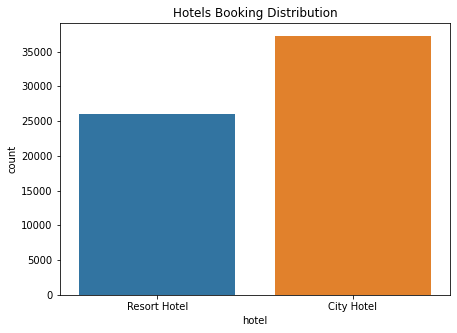

In [ ]:
#Comparing the Hotel Booking Distribution 
plt.figure(figsize=(7,5))
sns.countplot('hotel', data=df)
plt.title('Hotels Booking Distribution')

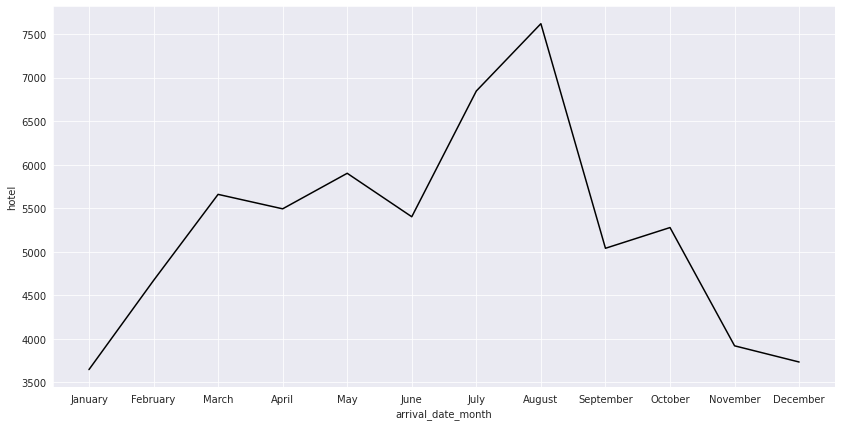

In [ ]:
# Plot line graph according to Number of Bookings in a Month
monthly_guests = df.groupby('arrival_date_month')['hotel'].count()
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
monthly_guests = monthly_guests.reindex(months_in_order)
sns.set_style('darkgrid')
plt.figure(figsize= (14,7))
sns.lineplot(monthly_guests.index,monthly_guests,color = 'black');

Text(0.5, 1.0, 'yearly bookings')

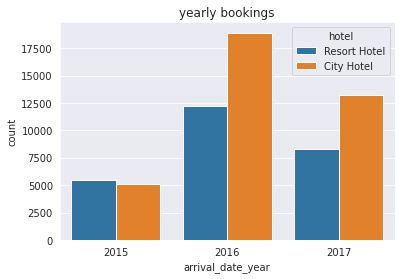

In [ ]:
# Plot Yearly Bookings Bar Graph
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel').set_title ('yearly bookings')

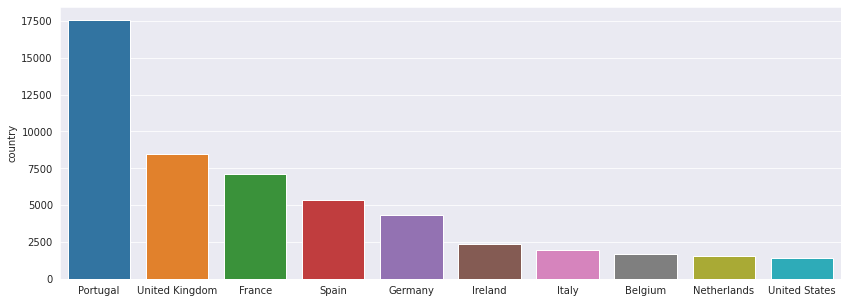

In [ ]:
# Bar Plot of Bookings according to Countries
plt.rcParams['figure.figsize'] = (14, 5) #Setting the size for the figures
x = df['country'].value_counts()[:10]
#For each country code select the country name 
country_name = []
for i in range(0,10):
  country_name.append( pc.countries.get(alpha_3=x.index[i]).name)
sns.barplot(country_name, x)

Text(0.5, 1.0, 'Hotel type vs No of Babies')

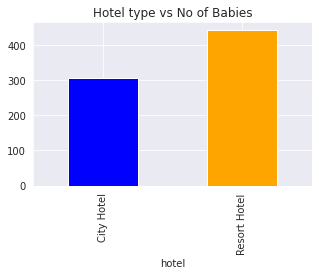

In [ ]:
# Bar Plot of Bookings with babies according to Month
plt.figure(figsize=(5,3))
df[df['babies'] > 0].groupby('hotel')['hotel'].count().plot.bar(color = ['blue','orange'])
plt.title('Hotel type vs No of Babies')

Text(0, 0.5, 'Count')

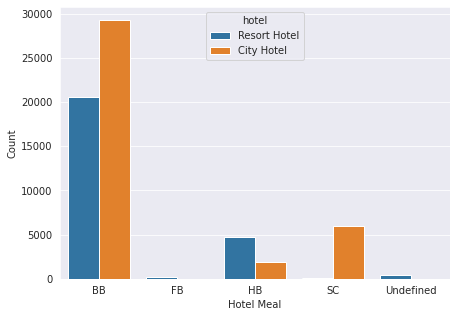

In [ ]:
# Bar Plot of preferred Meal Type by customers in each Hotel Type
plt.figure(figsize=(7,5))
sns.countplot(x='meal',data = df,hue = 'hotel')
plt.xlabel("Hotel Meal")
plt.ylabel("Count")

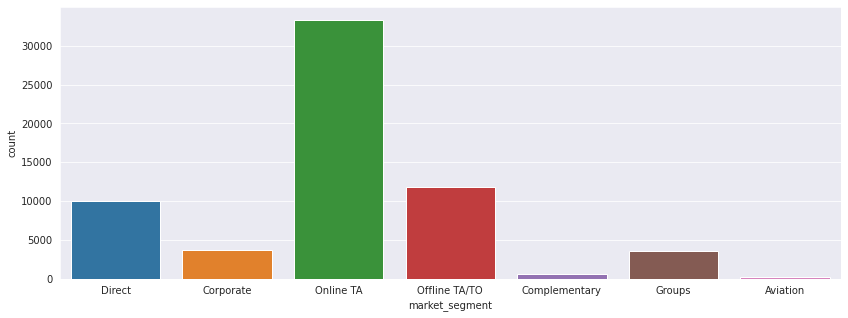

In [ ]:
# Total Bookings Count from each Market Segment
plt.rcParams['figure.figsize'] = (14, 5) #Setting the size for the figures
sns.countplot(data =df, x = 'market_segment')

Text(0, 0.5, 'Count')

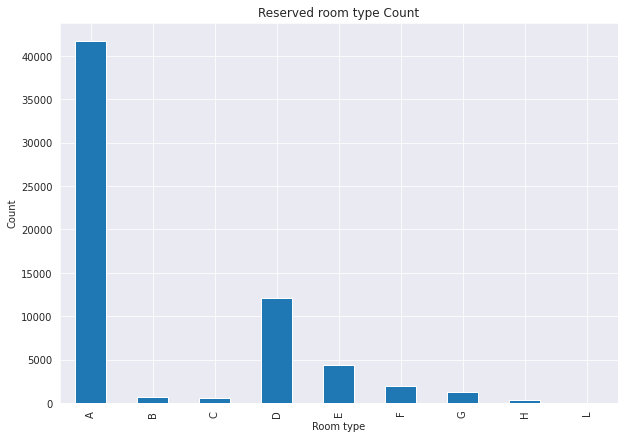

In [ ]:
#Plotting Alloted room types
plt.figure(figsize=(10,7))
df.groupby('reserved_room_type')['hotel'].count().plot.bar()
plt.title('Reserved room type Count')
plt.xlabel('Room type')
plt.ylabel('Count')

Text(0.5, 0, 'agent_id')

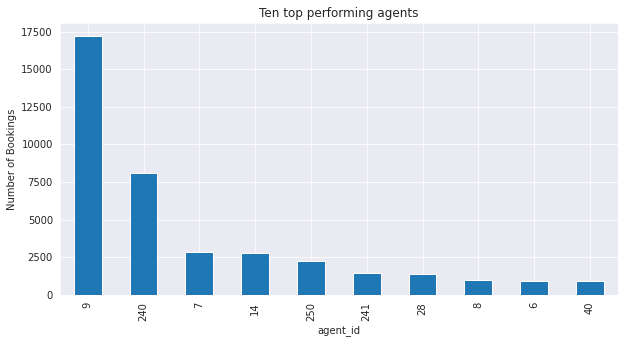

In [ ]:
# Finding top 10 performing agents
df_not_zero = df[df['agent'] != 0]
agent_performance = df_not_zero['agent'].value_counts().sort_values(ascending = False)[:10]
plt.rcParams['figure.figsize'] = (10, 5) #Setting the size for the figure
agent_performance.plot(kind='bar')
plt.title('Ten top performing agents')
plt.ylabel('Number of Bookings')
plt.xlabel('agent_id')

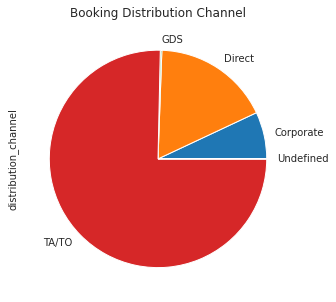

In [ ]:
#  Bboking Distribution Channel shares in Hotel Bookings
df.groupby('distribution_channel')['distribution_channel'].count().plot.pie(title='Booking Distribution Channel', figsize=(5, 5))

<Figure size 2160x216 with 0 Axes>

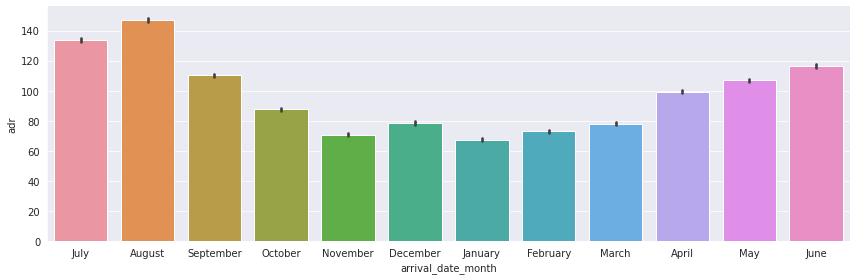

<Figure size 2160x216 with 0 Axes>

In [ ]:
# Plotting the Average Daily Rate(ADR)
sns.catplot(x='arrival_date_month',y='adr',kind='bar',data = df, height = 4, aspect = 3)
plt.figure(figsize=(30,3))

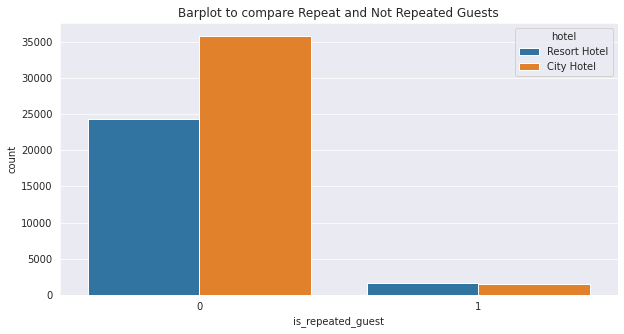

In [ ]:
# Finding the number of Repeat and Non-Repeat customer
sns.countplot('is_repeated_guest',data = df,hue = 'hotel').set_title('Barplot to compare Repeat and Not Repeated Guests');

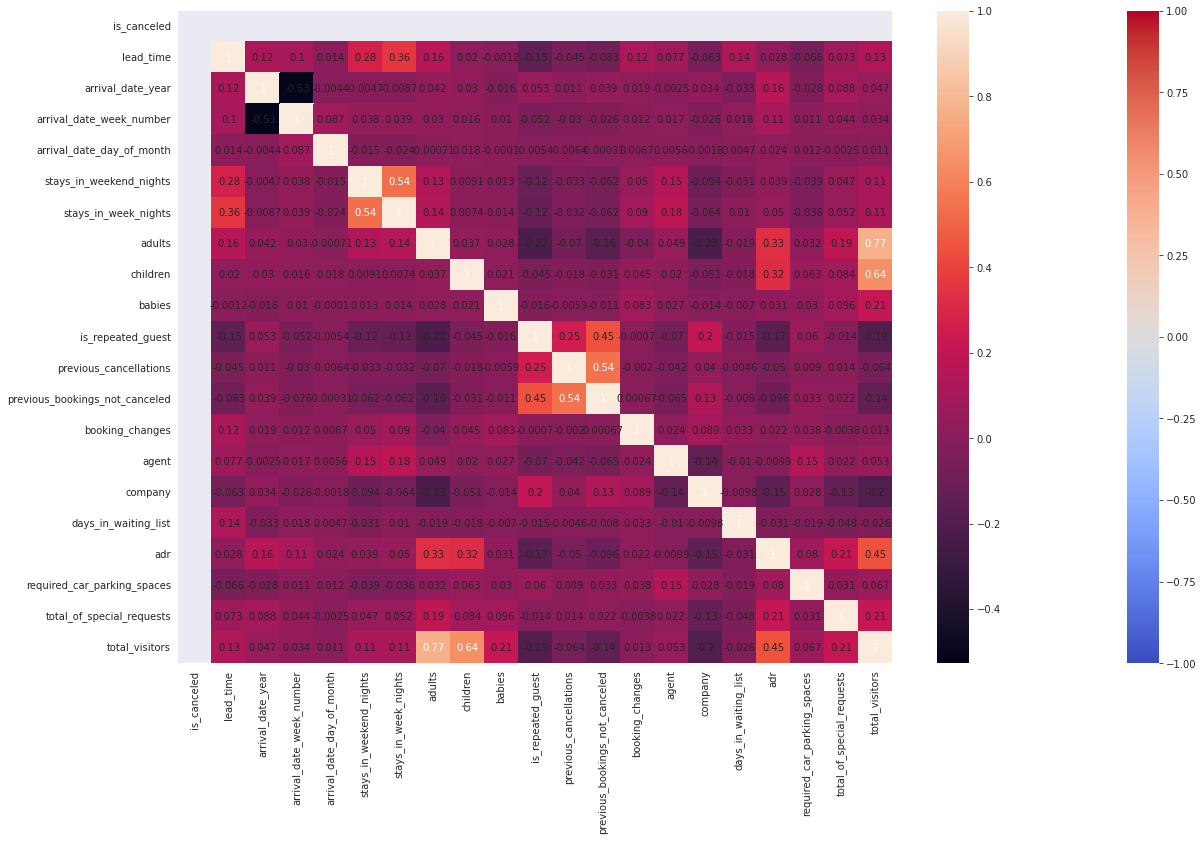

In [ ]:
#Heatmap showing correlation between the features
plt.figure(figsize=(20,12))
corr = df[df.describe().columns].corr()
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)
sns.heatmap(corr,)